# Todo List
- https://github.com/COGS108/Projects/blob/master/FinalProj_Checklist.pdf
- Introduction and Background
   - Overview
   - Research Question
   - Background and Prior Work
   - Hypothesis
- Dataset
- Data Analysis
   - Data Cleaning and Pre Processing
   - Data Visualization
   - Data Analysis and Results
- Privacy/Ethics Considerations
- Conclusions and Discussion

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# This magic command plots figures directly in the notebook
%matplotlib inline

# This sets a higher resolution for figures
%config InlineBackend.figure_format = 'retina'

# Statmodels & patsy
import patsy
import statsmodels.api as sm

# Seaborn
import seaborn as sns

# Display Party Affiliation Data

In [2]:
df_years = pd.read_csv('COGS 108_ State Data - Sheet4.csv')
df_years.head()

,Year,1978,1980,1982,1984,1986,1988,1990,1992,1994,1996,1998,2000,2002,2004,2006,2008,2010,2012,2014
0,Ohio,D,S,D,S,S,S,S,S,R,R,R,R,R,R,R,S,S,R,R
1,Alabama,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,R,R
2,Rhode Island,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D
3,Virginia,D,D,D,D,D,D,D,D,D,S,S,R,R,R,R,S,S,S,S
4,Illinois,D,S,D,D,D,D,D,S,S,S,S,S,D,D,D,D,D,D,D


In [3]:
# R = 0, S = 1, D = 2
df_years_replaced = df_years.replace(['R','S','D'], [0,1,2])
df_years_replaced.head()

,Year,1978,1980,1982,1984,1986,1988,1990,1992,1994,1996,1998,2000,2002,2004,2006,2008,2010,2012,2014
0,Ohio,2,1,2,1,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0
1,Alabama,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0
2,Rhode Island,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,Virginia,2,2,2,2,2,2,2,2,2,1,1,0,0,0,0,1,1,1,1
4,Illinois,2,1,2,2,2,2,2,1,1,1,1,1,2,2,2,2,2,2,2


# Scatter Plot

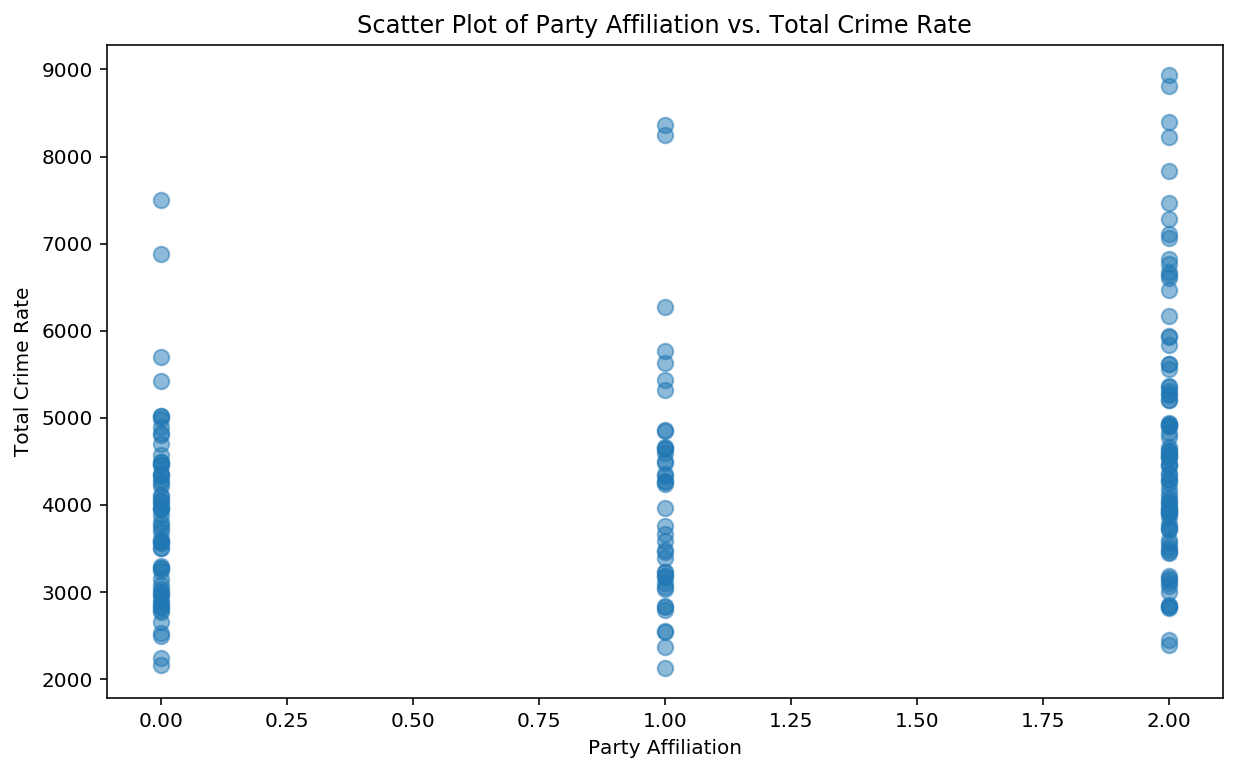

In [4]:
df_analysis = pd.read_csv('crimedata/experimental_dataset.csv')
df_analysis = df_analysis.dropna(axis='columns')
df_analysis = df_analysis.replace(['R','S','D'], [0,1,2])
x = df_analysis['Party Affiliation']
y = df_analysis['Total Crime Rate']

plt.figure(figsize=(10,6))
plt.scatter(x,y,s=60,alpha=0.5)
plt.title('Scatter Plot of Party Affiliation vs. Total Crime Rate')
plt.xlabel('Party Affiliation')
plt.ylabel('Total Crime Rate')
# may depend more on population rather than party affiliation? Confounding factor
# graph all the yearly data on one scatter plot <-
# merge violent crime rate and property crime rate <-
# averaging all year data together for another analysis
# combining violent crime rate and property crime rate


# p-value regression on the scatterplot, comparing it to a straight line
# add other states for line graphs

# Linear Regression

In [5]:
# hacky way of dealing with the syntax errors
df_analysis.columns = ['State','D1', 'D2', 'D3', 'D4']
outcome, predictors = patsy.dmatrices('D4 ~ D1', df_analysis)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     D4   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     17.92
Date:                Tue, 11 Jun 2019   Prob (F-statistic):           3.61e-05
Time:                        12:46:45   Log-Likelihood:                -1634.5
No. Observations:                 190   AIC:                             3273.
Df Residuals:                     188   BIC:                             3280.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3827.6259    157.059     24.371      0.0

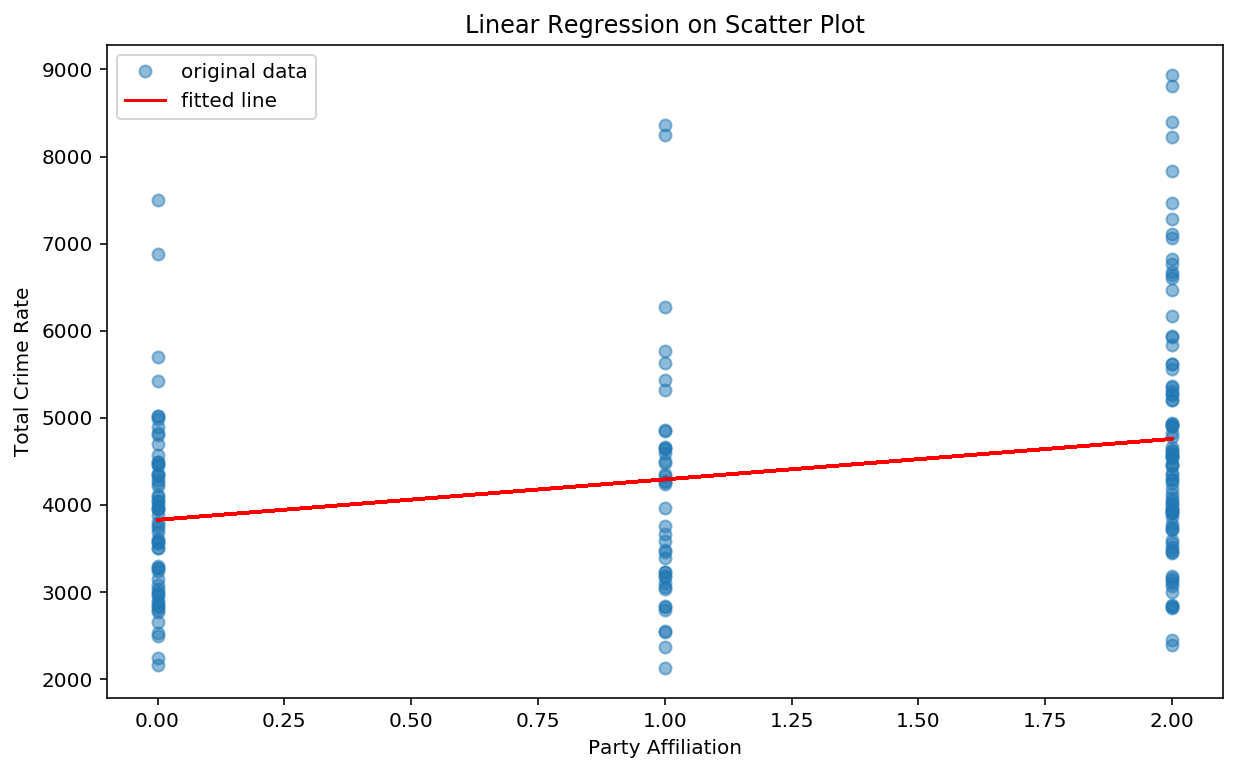

In [6]:
# Plot regression on the graph
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.figure(figsize=(10,6))
plt.plot(x, y, 'o', label='original data',alpha=0.5)
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.title('Linear Regression on Scatter Plot')
plt.xlabel('Party Affiliation')
plt.ylabel('Total Crime Rate')
plt.legend()

# Correlation Matrix

In [7]:
df_analysis.corr()

,D1,D2,D3,D4
D1,1.000000,0.303099,0.278807,0.294969
D2,0.303099,1.000000,0.719456,0.800093
D3,0.278807,0.719456,1.000000,0.992268
D4,0.294969,0.800093,0.992268,1.000000


# Box Plot

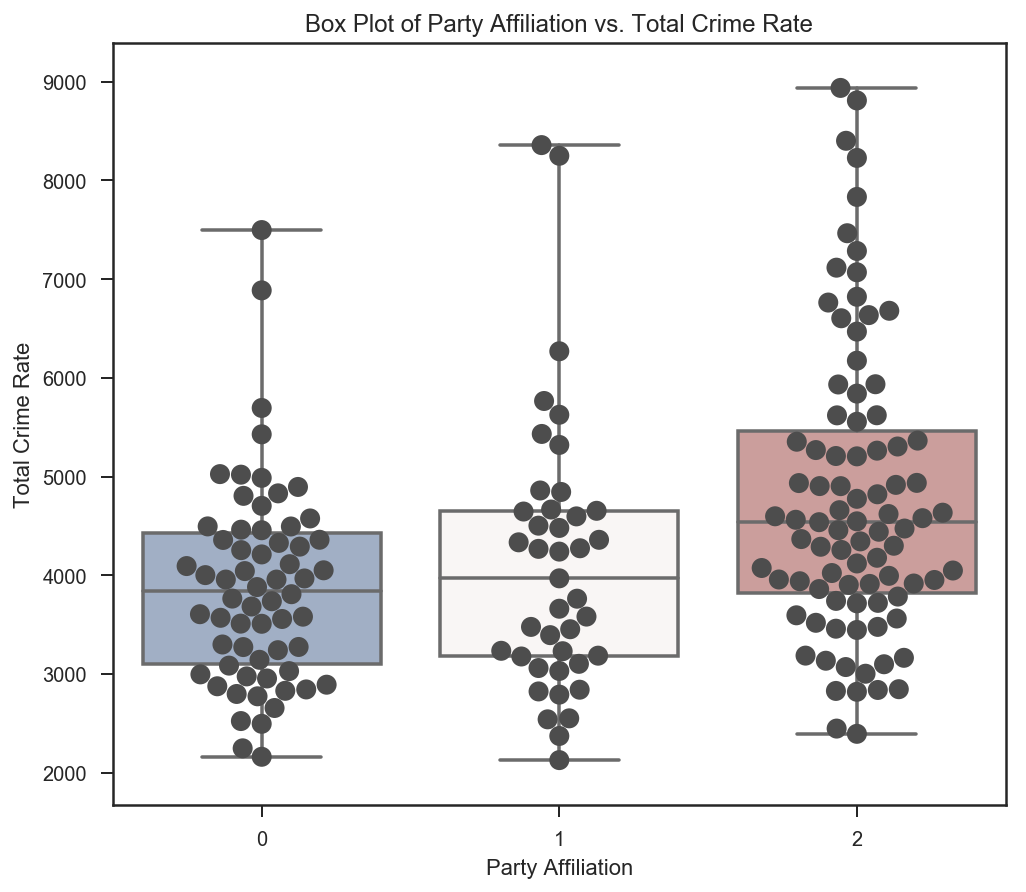

In [8]:
sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(8, 7))



# Plot the orbital period with horizontal boxes
sns.boxplot(x, y, data=df_analysis, whis="range", palette="vlag")

# Add in points to show each observation
sns.swarmplot(x, y, data=df_analysis, size=10,color=".3", linewidth=0)
plt.title('Box Plot of Party Affiliation vs. Total Crime Rate')

# Violin Plot

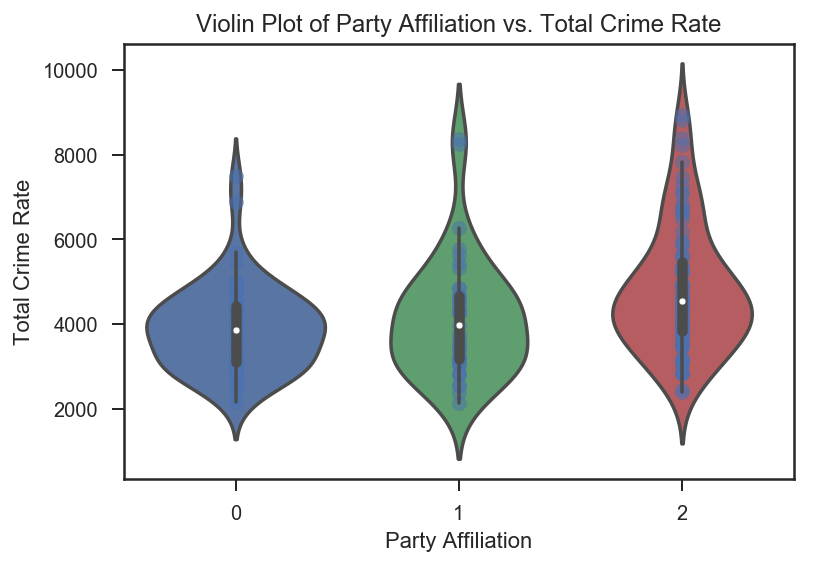

In [9]:
ax = sns.violinplot(x, y, split=True, data=df_analysis)
sns.set(rc={'figure.figsize':(10,6)})
plt.scatter(x, y, alpha=0.5)
plt.title('Violin Plot of Party Affiliation vs. Total Crime Rate')
plt.xlabel('Party Affiliation')
plt.ylabel('Total Crime Rate')
plt.show()

# Display Crime Rate Data

In [10]:
df_ca = pd.read_csv('crimedata/california_crime.csv')
df_ca.head()

,Year,Violent Crime,Murder and Nonnegligent Manslaughter,Legacy Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny-theft,Motor Vehicle Theft
0,1960,239.0,3.9,18.2,97.3,119.6,3235.4,910.5,1984.8,340.1
1,1961,232.7,3.7,18.5,90.5,120.0,3177.5,894.2,1950.6,332.7
2,1962,234.8,3.9,17.4,91.9,121.7,3326.2,934.1,2052.9,339.2
3,1963,241.2,3.8,17.5,93.6,126.3,3545.8,998.9,2184.7,362.2
4,1964,265.6,4.1,20.0,103.2,138.2,3874.3,1088.7,2366.5,419.1


In [11]:
df_ca.describe()

,Year,Violent Crime,Murder and Nonnegligent Manslaughter,Legacy Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny-theft,Motor Vehicle Theft
count,55.00000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,1987.00000,633.252727,8.187273,33.774545,238.550909,352.441818,4657.490909,1299.329091,2712.254545,645.889091
std,16.02082,247.621045,3.083472,11.108759,96.227652,150.985053,1408.418907,570.152725,748.989155,191.447667
min,1960.00000,232.700000,3.700000,17.400000,90.500000,119.600000,2441.100000,522.300000,1527.400000,332.700000
25%,1973.50000,450.950000,5.600000,24.450000,172.850000,240.450000,3299.500000,684.650000,2005.400000,508.200000
50%,1987.00000,610.600000,7.100000,32.100000,210.600000,338.700000,4865.100000,1277.400000,2856.900000,644.300000
75%,2000.50000,812.900000,10.750000,42.100000,327.600000,424.200000,5814.050000,1741.150000,3362.950000,712.950000
max,2014.00000,1119.700000,14.500000,58.200000,424.100000,641.600000,6939.500000,2316.500000,3880.000000,1038.900000


In [12]:
df_fl = pd.read_csv('crimedata/florida_crime.csv')
df_al = pd.read_csv('crimedata/alabama_crime.csv')
df_il = pd.read_csv('crimedata/illinois_crime.csv')
df_mo = pd.read_csv('crimedata/montana_crime.csv')
df_oh = pd.read_csv('crimedata/ohio_crime.csv')
df_penn = pd.read_csv('crimedata/penn_crime.csv')
df_ri = pd.read_csv('crimedata/rhodeisland_crime.csv')
df_vi = pd.read_csv('crimedata/virginia_crime.csv')
df_wy = pd.read_csv('crimedata/wyoming_crime.csv')

# Measures of Central Tendency

In [13]:
df_fl.describe()

,Year,Violent Crime,Murder and Nonnegligent Manslaughter,Legacy Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny-theft,Motor Vehicle Theft
count,55.00000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,1987.00000,729.278182,9.267273,36.634545,222.690909,460.261818,5221.970909,1483.469091,3280.465455,458.040000
std,16.02082,287.432383,3.089172,15.103203,97.799614,184.312847,1659.784672,551.430762,990.611656,210.980285
min,1960.00000,192.100000,5.000000,5.800000,63.300000,115.300000,2243.300000,708.700000,1353.000000,168.300000
25%,1973.50000,527.550000,6.300000,26.800000,161.350000,328.450000,3913.500000,972.200000,2509.950000,302.800000
50%,1987.00000,716.400000,9.100000,38.000000,199.000000,495.800000,5125.200000,1459.800000,3154.800000,426.700000
75%,2000.50000,953.100000,11.400000,50.450000,293.400000,577.500000,6671.400000,1966.750000,4222.450000,578.050000
max,2014.00000,1244.300000,15.400000,56.900000,416.800000,785.700000,7819.900000,2506.800000,4760.600000,911.500000


# Display Change in Crime Rate Overtime

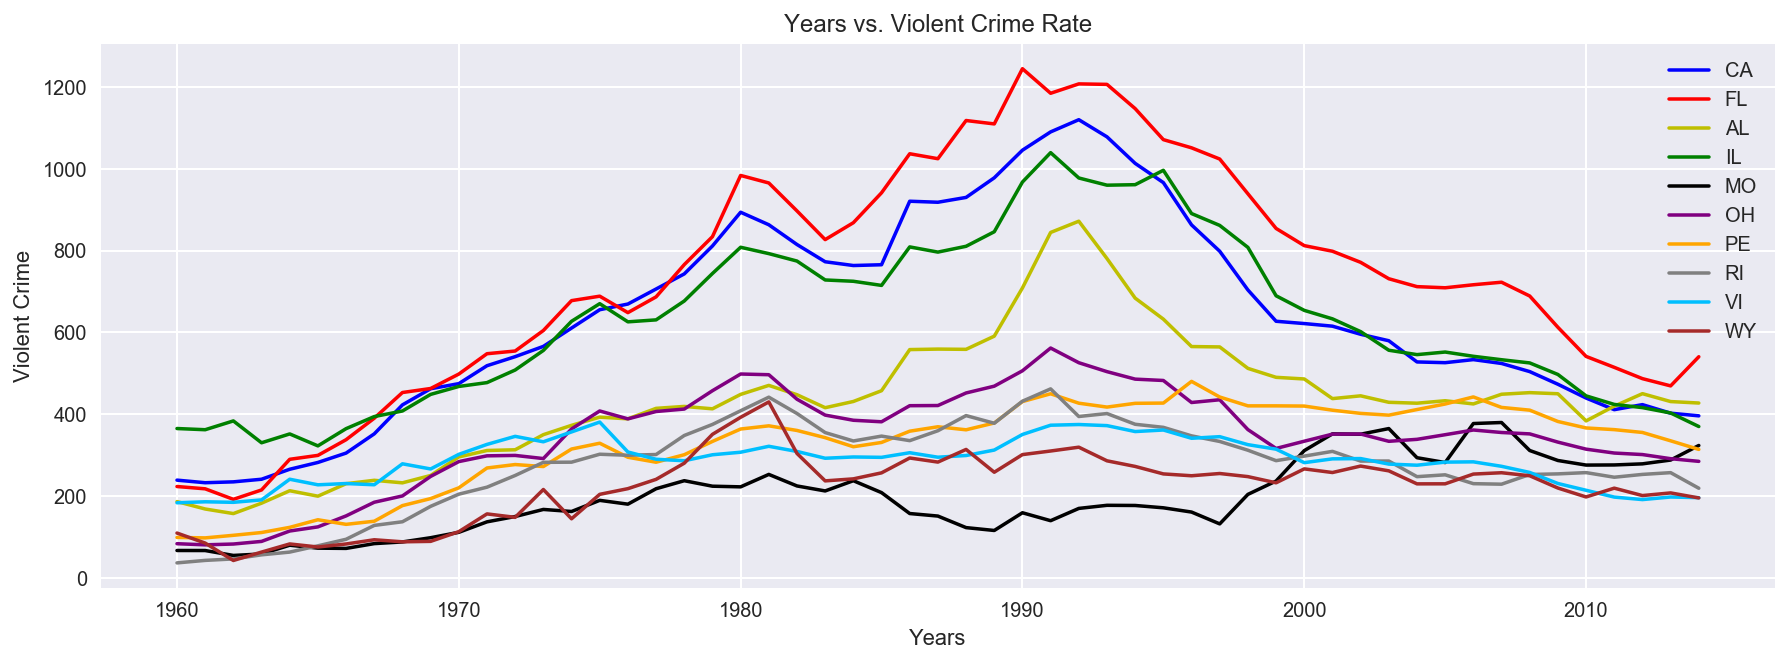

In [14]:
# Years vs. Crimes
x_ca = df_ca['Year']
y_ca = df_ca['Violent Crime']
x_fl = df_fl['Year']
y_fl = df_fl['Violent Crime']
x_al = df_al['Year']
y_al = df_al['Violent Crime']
x_il = df_il['Year']
y_il = df_il['Violent Crime']
x_mo = df_mo['Year']
y_mo = df_mo['Violent Crime']
x_oh = df_oh['Year']
y_oh = df_oh['Violent Crime']
x_penn = df_penn['Year']
y_penn = df_penn['Violent Crime']
x_ri = df_ri['Year']
y_ri = df_ri['Violent Crime']
x_vi = df_vi['Year']
y_vi = df_vi['Violent Crime']
x_wy = df_wy['Year']
y_wy = df_wy['Violent Crime']

f1 = plt.figure(figsize=(15,5))
plt.plot(x_ca, y_ca, 'b', label='CA')
plt.plot(x_fl, y_fl, 'r', label='FL')
plt.plot(x_al, y_al, 'y', label='AL')
plt.plot(x_il, y_il, 'g', label='IL')
plt.plot(x_mo, y_mo, 'k', label='MO')
plt.plot(x_oh, y_oh, 'purple', label='OH')
plt.plot(x_penn, y_penn, 'orange', label='PE')
plt.plot(x_ri, y_ri, 'gray', label='RI')
plt.plot(x_vi, y_vi, 'deepskyblue', label='VI')
plt.plot(x_wy, y_wy, 'brown', label='WY')

plt.legend()
plt.title('Years vs. Violent Crime Rate')
plt.xlabel('Years')
plt.ylabel('Violent Crime')

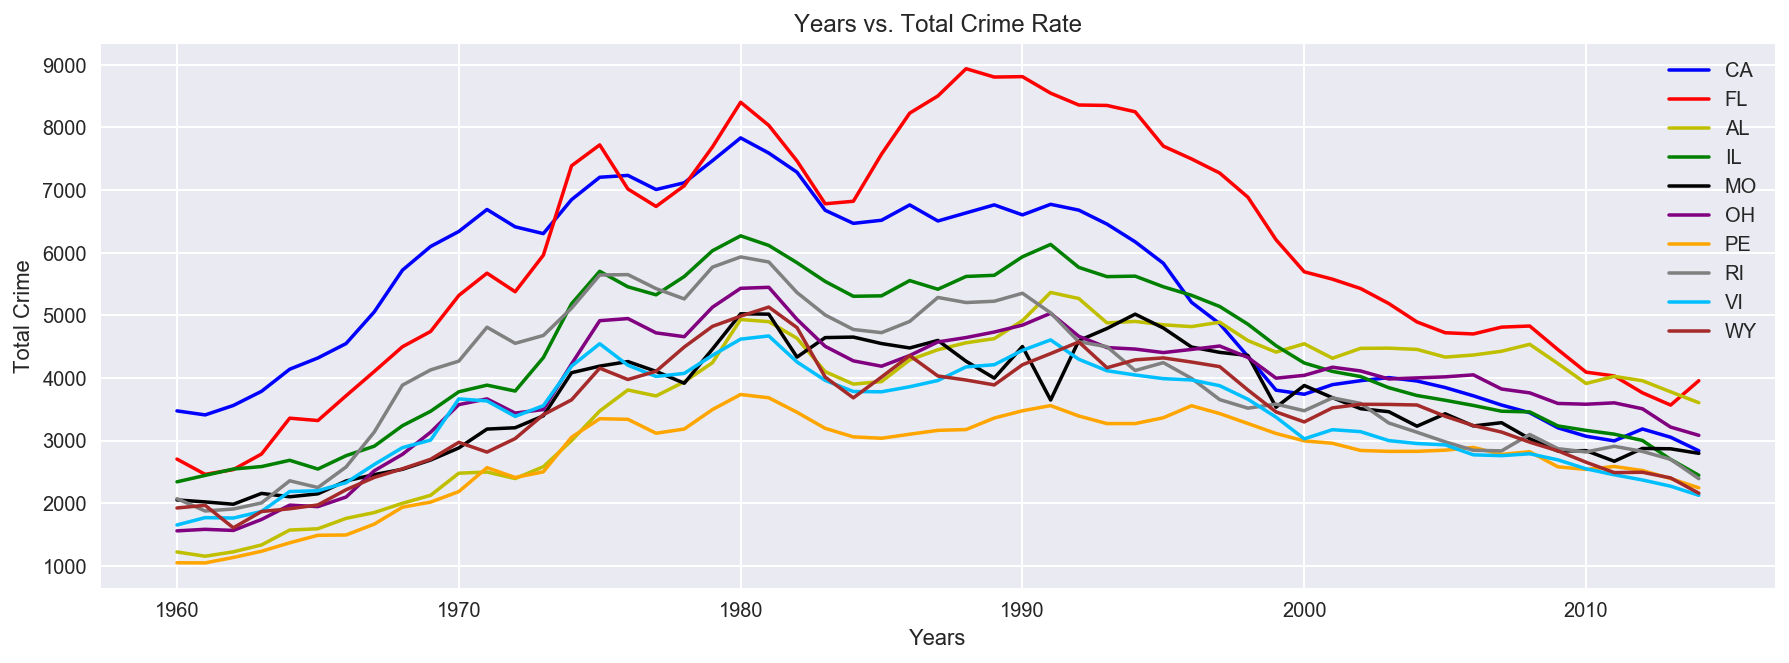

In [15]:
# Years vs. Total Crime
x_ca = df_ca['Year']
y_ca = df_ca['Violent Crime'] + df_ca['Property Crime']
x_fl = df_fl['Year']
y_fl = df_fl['Violent Crime'] + df_fl['Property Crime']
x_al = df_al['Year']
y_al = df_al['Violent Crime'] + df_al['Property Crime']
x_il = df_il['Year']
y_il = df_il['Violent Crime'] + df_il['Property Crime']
x_mo = df_mo['Year']
y_mo = df_mo['Violent Crime'] + df_mo['Property Crime']
x_oh = df_oh['Year']
y_oh = df_oh['Violent Crime'] + df_oh['Property Crime']
x_penn = df_penn['Year']
y_penn = df_penn['Violent Crime'] + df_penn['Property Crime']
x_ri = df_ri['Year'] 
y_ri = df_ri['Violent Crime'] + df_ri['Property Crime']
x_vi = df_vi['Year']
y_vi = df_vi['Violent Crime'] + df_vi['Property Crime']
x_wy = df_wy['Year']
y_wy = df_wy['Violent Crime'] + df_wy['Property Crime']

f1 = plt.figure(figsize=(15,5))
plt.plot(x_ca, y_ca, 'b', label='CA')
plt.plot(x_fl, y_fl, 'r', label='FL')
plt.plot(x_al, y_al, 'y', label='AL')
plt.plot(x_il, y_il, 'g', label='IL')
plt.plot(x_mo, y_mo, 'k', label='MO')
plt.plot(x_oh, y_oh, 'purple', label='OH')
plt.plot(x_penn, y_penn, 'orange', label='PE')
plt.plot(x_ri, y_ri, 'gray', label='RI')
plt.plot(x_vi, y_vi, 'deepskyblue', label='VI')
plt.plot(x_wy, y_wy, 'brown', label='WY')

plt.legend()
plt.title('Years vs. Total Crime Rate')
plt.xlabel('Years')
plt.ylabel('Total Crime')